## Ejercicio 2
Para cada una de las 2 versiones del generador implementado en el ejercicio 1:


*    Proponer, y realizar, al menos 2 tests para evaluar su comportamiento.

*    Evaluar e interpretar los resultados de cada uno para distintos tamaños de muestras.




In [47]:
from scipy.stats import chi2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from generators import LXM

/content/generators.py:65: RuntimeWarning: overflow encountered in ulong_scalars
  self.Xi = self.multiplicador * self.Xi + self.incremento
/content/generators.py:87: RuntimeWarning: overflow encountered in ulong_scalars
  result = (self.x0 + self.x1) & np.iinfo(np.uint64).max


Estadistico: 26.78 
límit superior: 44.99 
El test acepta la hipotesis nula.


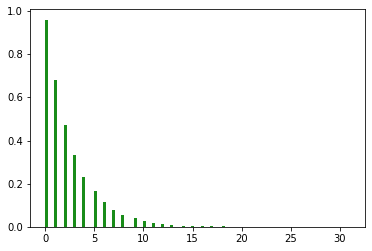

In [46]:
generador = LXM()

cantidadGaps = 100000
gaps = []
gapB = 0.5
gapA = 0.2
pE = gapB - gapA #probabilidad de caer en el gap

a = -1
#genero valores hasta que el primero cae en el gap
while (not (0.2 < a <= 0.5)):
    a = generador.generar()

#Genero una deteminada cantidad de gaps
contGap = 0
cont = 0

while (cont < cantidadGaps):
    if (0.2 < a <= 0.5):
        gaps.append(contGap)
        contGap = 0
        cont += 1
    else:
        contGap += 1

    a = generador.generar()

    
auxFrec = np.array(gaps)
maxFrec = np.amax(auxFrec)
frec = np.zeros(maxFrec + 1)    

#Genero array con las frecuencias de los gaps 
for v in gaps:
    frec[v] += 1


plt.hist(gaps, color="g", bins=100, alpha=0.9, density=True)

#Se calcula el estadístico
D2 = 0
tamGap = 0
for fr in frec:
    D2 += ((fr - (pE*(1-pE)**tamGap)*cantidadGaps)**2)/((pE*(1-pE)**tamGap)*cantidadGaps)
    tamGap += 1

limiteSuperior = chi2.ppf(0.95, df=maxFrec)

print("Estadistico: {:.2f} ".format(D2))
print("límit superior: {:.2f} ".format(limiteSuperior))
if D2 <= limiteSuperior:
    print("El test acepta la hipotesis nula.")
else:
    print("El test rechaza la hipótesis nula")

plt.show()

Se propone un test general chi2 partiendo el intervalo [0,1] en 10 clases y usando alfa=0.01


In [28]:
N = 100000
generador = LXM()
valores = generador.generar_vector(cantidad = N)

k = 10 #cantidad de clases
frecuencias = []
frecuencias.append(valores[(valores < 0.1)].size)
for i in np.arange(0.1, 0.8, 0.1):
  frecuencias.append(valores[(valores > i) & (valores < i+0.1)].size)
frecuencias.append(valores[(valores > 0.9)].size)
print("Frecuencias: ", frecuencias)

D2 = sum([(fO - 1/5*N)**2 for fO in frecuencias])/(1/5*N)
limiteSuperior = chi2.ppf(0.99, df=4)

print("Estadistico: {:.2f} ".format(D2))
print("Limite superior: {:.2f} ".format(limiteSuperior))
if D2 <= limiteSuperior:
    print("El test acepta la hipotesis nula.")
else:
    print("El test rechaza la hipótesis nula")

/content/generators.py:65: RuntimeWarning: overflow encountered in ulong_scalars
  self.Xi = self.multiplicador * self.Xi + self.incremento
/content/generators.py:87: RuntimeWarning: overflow encountered in ulong_scalars
  result = (self.x0 + self.x1) & np.iinfo(np.uint64).max


Frecuencias:  [9971, 9997, 9863, 9952, 10148, 9962, 10044, 9953, 9971]
Estadistico: 45141.51 
Limite superior: 13.28 
El test rechaza la hipótesis nula


Como se puede observar en la ejecución de este test, se rechaza la hipótesis nula.

Para finalizar, haremos tests espectrales para visualizar si existen patrones en los numeros generados

/content/generators.py:65: RuntimeWarning: overflow encountered in ulong_scalars
  self.Xi = self.multiplicador * self.Xi + self.incremento
/content/generators.py:87: RuntimeWarning: overflow encountered in ulong_scalars
  result = (self.x0 + self.x1) & np.iinfo(np.uint64).max


Dimensiones (filas,cols) = (5000, 2)


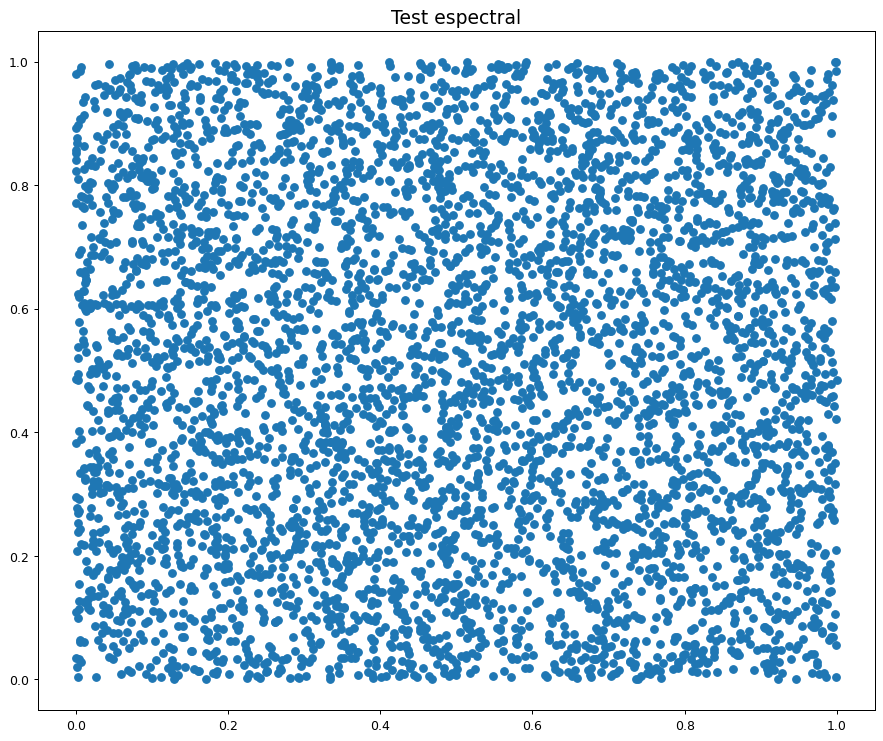

In [39]:
N=10000
generador = LXM()
valores = generador.generar_vector(cantidad = N)

matriz = np.reshape(valores, (-1, 2)) 
print("Dimensiones (filas,cols) = {0}".format(matriz.shape))

x, y = matriz.T
plt.figure(figsize=(12, 10), dpi=90)
plt.title('Test espectral', size=15)
plt.scatter(x, y)
plt.show()

Se puede visualizar que no hay patrones ni en el centro de la imagen ni sobre las esquinas. Nos fijamos en 3 dimensiones para corroborar

/content/generators.py:65: RuntimeWarning: overflow encountered in ulong_scalars
  self.Xi = self.multiplicador * self.Xi + self.incremento
/content/generators.py:87: RuntimeWarning: overflow encountered in ulong_scalars
  result = (self.x0 + self.x1) & np.iinfo(np.uint64).max


Dimensiones (filas,cols) = (3334, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


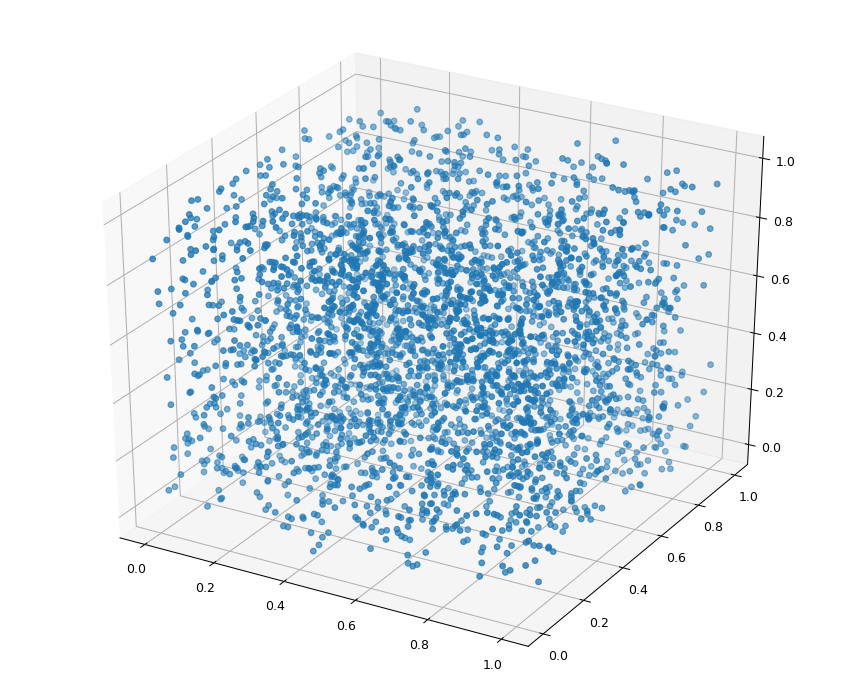

In [48]:
from mpl_toolkits.mplot3d import Axes3D 
N=10002
generador = LXM()
valores = generador.generar_vector(cantidad = N)

matriz = np.reshape(valores, (-1, 3)) 
print("Dimensiones (filas,cols) = {0}".format(matriz.shape))

x, y, z = matriz.T

fig = plt.figure(figsize=(12, 10), dpi=90) 
plt.title('Test espectral', size=15)
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z)
plt.show()

Podemos confirmar que tampoco se observan patrones en 3 dimensiones.